In [1]:
# imports
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("output.csv", index_col=0)
df.columns.to_list()

['entropy',
 'complexity',
 'aeX',
 'aeY',
 'chunk_num',
 'labels',
 'dataset',
 'isDegraded',
 'autocluster',
 'egci_clusters']

In [3]:
target_columns = ['dataset', 'autocluster', 'egci_clusters', 'labels']
df = df[target_columns]
df = df.astype(str)

In [4]:
nodelist = pd.melt(df)
nodelist = [var + val for var, val in nodelist.drop_duplicates().to_numpy()]

In [5]:
adjacency_df = pd.DataFrame(0, index=nodelist, columns=nodelist)

In [6]:
from itertools import product

for row in df.itertuples():
    nodes = [row._fields[i]+str(row[i]) for i in range(len(row._fields)) if row._fields[i] != "Index"]
    for node1, node2 in product(nodes, nodes):
        if node1 != node2:
            adjacency_df.loc[node1, node2] += 1

In [7]:
normalize = lambda e: (e-e.min())/(e.max()-e.min())

normalize = lambda e: e

for column in adjacency_df.columns.to_list():
    adjacency_df[column] = normalize(adjacency_df[column])
    
for index in adjacency_df.index:
    adjacency_df.loc[index] = normalize(adjacency_df.loc[index])

<Axes: >

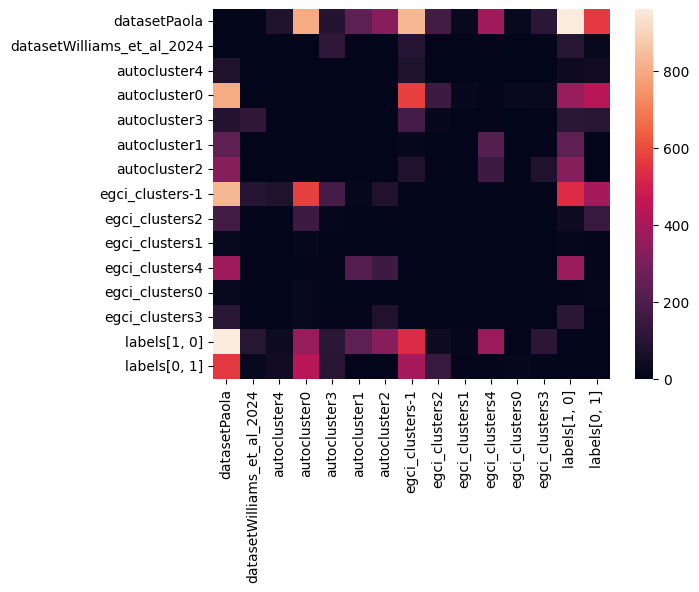

In [8]:
import seaborn as sns
sns.heatmap(adjacency_df)

In [10]:
from d3graph import d3graph
import os

d3 = d3graph(charge=10000)
d3.graph(adjacency_df)

d3.show(filepath=os.getcwd()+"/output.html", showfig=False)

[20-08-2025 11:11:16] [d3graph.d3graph] [INFO] Set directed=True to see the markers!
[20-08-2025 11:11:16] [d3graph.d3graph] [INFO] Keep only edges with weight>0
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Converting source-target into adjacency matrix..
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Making the matrix symmetric..
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Converting adjacency matrix into source-target..
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Number of unique nodes: %.0d
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Slider range is set to [0, 960]
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] Write to path: [/Users/anu/Documents/e4e/anu_experiments_acoustic_species/pipeline/output.html]
[20-08-2025 11:11:18] [d3graph.d3graph] [INFO] File already exists and will be overwritten: [/Users/anu/Documents/e4e/anu_experiments_acoustic_species/pipeline/output.html]
